In [70]:
import pandas as pd
import numpy as np

In [71]:
data = pd.read_csv('movies.csv')
shape = data.shape
print(shape)

(9742, 3)


In [72]:
data = pd.read_csv('ratings.csv')
shape = data.shape
print(shape)

(100836, 4)


In [73]:
data = pd.read_csv('ratings.csv')
shape = data['userId'].unique().shape
print(shape)

(610,)


In [74]:
data = pd.read_csv('ratings.csv')
df = pd.DataFrame(data)

# finding id
rating_counts = df['movieId'].value_counts()
id = rating_counts.idxmax()

# finding name
data = pd.read_csv('movies.csv')
df = pd.DataFrame(data)

print(df.loc[df['movieId']==id],'title')

     movieId                title                    genres
314      356  Forrest Gump (1994)  Comedy|Drama|Romance|War title


In [75]:
data = pd.read_csv('movies.csv')
df = pd.DataFrame(data)

id  = df.loc[df['title'] == 'Terminator 2: Judgment Day (1991)','movieId'].values[0]

data = pd.read_csv('ratings.csv')
df = pd.DataFrame(data)

average = df.groupby('movieId')['rating'].mean()
print(average.loc[id])


3.970982142857143


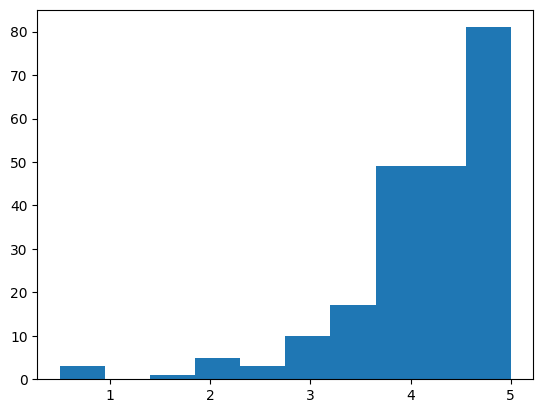

from histogram we can say right skewed distribution


In [76]:
data = pd.read_csv('movies.csv')
df = pd.DataFrame(data)

id  = df.loc[df['title'] == 'Fight Club (1999)','movieId'].values[0]

data = pd.read_csv('ratings.csv')
df= pd.DataFrame(data)

ratings = df.loc[df['movieId'] == id]

import matplotlib.pyplot as plt

plt.hist(ratings['rating'])
plt.show()

print("from histogram we can say right skewed distribution")

In [77]:
data_ratings = pd.read_csv('ratings.csv')
df_ratings= pd.DataFrame(data_ratings)

grouped_count = df_ratings.groupby('movieId')['rating'].count().rename('rating_count').reset_index()

grouped_mean = df_ratings.groupby('movieId')['rating'].mean().rename('rating_mean').reset_index()

In [78]:
grouped_count.head()

,movieId,rating_count
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49


In [79]:
grouped_mean.head()

,movieId,rating_mean
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429


In [80]:
data_movie = pd.read_csv('movies.csv')
df_movie = pd.DataFrame(data_movie)

join = pd.merge(grouped_count, df_movie, on='movieId',how='inner')

join.head()

,movieId,rating_count,title,genres
0,1,215,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,110,Jumanji (1995),Adventure|Children|Fantasy
2,3,52,Grumpier Old Men (1995),Comedy|Romance
3,4,7,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,49,Father of the Bride Part II (1995),Comedy


In [81]:
join = pd.DataFrame(join)
rating_more_than_50 = join['rating_count'] > 50
join = join[rating_more_than_50]

join.head()

,movieId,rating_count,title,genres
0,1,215,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,110,Jumanji (1995),Adventure|Children|Fantasy
2,3,52,Grumpier Old Men (1995),Comedy|Romance
5,6,102,Heat (1995),Action|Crime|Thriller
6,7,54,Sabrina (1995),Comedy|Romance


In [82]:
k = np.array(join['movieId'])
data = pd.read_csv('ratings.csv')

df = pd.DataFrame(data)
dfk = df.loc[df['movieId'].isin(k)]
average = dfk.groupby('movieId')['rating'].mean()
most_popular = average.sort_values(ascending=False)

most_popular.head(1)
data = pd.read_csv('movies.csv')
df = pd.DataFrame(data)

print(df.loc[df['movieId']==most_popular.index[0]])

     movieId                             title       genres
277      318  Shawshank Redemption, The (1994)  Crime|Drama


In [83]:
top_5 = join.sort_values(by='rating_count',ascending=False)
top_5.head()

,movieId,rating_count,title,genres
314,356,329,Forrest Gump (1994),Comedy|Drama|Romance|War
277,318,317,"Shawshank Redemption, The (1994)",Crime|Drama
257,296,307,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
510,593,279,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
1938,2571,278,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [84]:
third_SCI_FI = join[join['genres'].str.contains('Sci-Fi')]
third_SCI_FI = third_SCI_FI.sort_values(by='rating_count',ascending=False)
third_SCI_FI.head(3)

,movieId,rating_count,title,genres
1938,2571,278,"Matrix, The (1999)",Action|Sci-Fi|Thriller
224,260,251,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
418,480,238,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller


In [85]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    new_id = f"{int(imdbId):07d}"
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }

    try:
        response = requests.get(URL, headers=request_header)
        response.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f"Error during requests to {URL}: {e}")
        return np.nan

    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', attrs={'class': 'sc-eb51e184-1 ljxVSS'})
    return imdb_rating.text.strip() if imdb_rating else np.nan

In [86]:
links_df = pd.read_csv('links.csv')
ratings = []
i=0
for index, row in links_df.iterrows():
    imdb_id = row['imdbId']
    movie_id = row['movieId']
    rating = scrapper(imdb_id)
    ratings.append({'movieId': movie_id, 'imdbId': imdb_id, 'rating': rating})

ratings_df = pd.DataFrame(ratings)
highest_rated_movie = ratings_df.loc[ratings_df['rating'].idxmax()]

print(f"Movie with the highest IMDb rating:")
print(f"Movie ID: {highest_rated_movie['movieId']}")
print(f"IMDb Rating: {highest_rated_movie['rating']}")

{'movieId': 1.0, 'imdbId': 114709.0, 'rating': '8.3'}
{'movieId': 2.0, 'imdbId': 113497.0, 'rating': '7.1'}
{'movieId': 3.0, 'imdbId': 113228.0, 'rating': '6.7'}
{'movieId': 4.0, 'imdbId': 114885.0, 'rating': '6.0'}
Movie with the highest IMDb rating:
Movie ID: 1.0
IMDb Rating: 8.3


In [88]:
import pandas as pd
df_links = pd.read_csv('links.csv')
merged_df = pd.merge(df_links, join, on='movieId', how='inner')
sci_fi_df = merged_df[merged_df['genres'].str.contains('Sci-Fi', case=False, na=False)]

ratings = []
i = 0
for index, row in sci_fi_df.iterrows():
    imdb_id = row['imdbId']
    movie_id = row['movieId']
    rating = scrapper(imdb_id)
    print({'movieId': movie_id, 'imdbId': imdb_id, 'rating': rating})
    if not pd.isna(rating):
        ratings.append({'movieId': movie_id, 'imdbId': imdb_id, 'rating': rating})
ratings_df = pd.DataFrame(ratings)

if not ratings_df.empty and 'rating' in ratings_df.columns:
    highest_rated_movie = ratings_df.loc[ratings_df['rating'].idxmax()]
    print(f"Movie ID: {highest_rated_movie['movieId']}")
else:
    print("No valid ratings found.")


{'movieId': 32, 'imdbId': 114746, 'rating': '8.0'}
{'movieId': 160, 'imdbId': 112715, 'rating': '5.3'}
{'movieId': 172, 'imdbId': 113481, 'rating': '5.6'}
{'movieId': 173, 'imdbId': 113492, 'rating': '5.6'}
Movie ID: 32
